## Evaluate CNN 3 Classes

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
data_path = "/content/drive/MyDrive/FSW_Data/Lab_Data_Training_3/"
model_path =  "/content/drive/MyDrive/FSW_Data/1108_Seg_Checkpoint_3/"

!ls "/content/drive/MyDrive/FSW_Data/1108_Seg_Checkpoint_3/"

DenseNet121_1.tf     EfficientNetV2S_1.tf    MobileNetV2_1.tf
DenseNet121_2.tf     EfficientNetV2S_2.tf    MobileNetV2_2.tf
DenseNet121_3.tf     EfficientNetV2S_3.tf    MobileNetV2_3.tf
DenseNet121_4.tf     EfficientNetV2S_4.tf    MobileNetV2_4.tf
DenseNet121_5.tf     EfficientNetV2S_5.tf    MobileNetV2_5.tf
EfficientNetB1_1.tf  InceptionResNetV2_1.tf  ResNet101V2_1.tf
EfficientNetB1_2.tf  InceptionResNetV2_2.tf  ResNet101V2_2.tf
EfficientNetB1_3.tf  InceptionResNetV2_3.tf  ResNet101V2_3.tf
EfficientNetB1_4.tf  InceptionResNetV2_4.tf  ResNet101V2_4.tf
EfficientNetB1_5.tf  InceptionResNetV2_5.tf  ResNet101V2_5.tf


In [3]:
!ls '/content/drive/MyDrive/FSW_Data/Lab_Data_Testing_3/'

Good_Weld  Pass_Weld  Poor_Weld


In [4]:
# The setup

import os
import datetime
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from skimage import io
from skimage import transform, io
from os import listdir

import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from keras import Model, models
from keras import backend as k
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, auc

In [5]:
# Function for support

def show_most_simm(Xs, fig_row, fig_col, sz=20, show=True):
    plt.figure(figsize=(sz,sz))
    plt.imshow(Xs[0])
    for i in range(0, ((fig_row * fig_col)+1)):
        try:
            plt.axis('off')
            plt.subplot(fig_row, fig_col, i+1)   
            if len(Xs[i].shape) == 3:
                plt.imshow(Xs[i].reshape((Xs[i].shape[0], Xs[i].shape[1], Xs[i].shape[2])), cmap="gray")
            else:
                plt.imshow(Xs[i].reshape((Xs[i].shape[0], Xs[i].shape[1])), cmap="gray")
        except:
            print("Error")
            pass
    if show:
        plt.show()

def displaytext(x,indexs, N=5):
    s = ""
    for i in range(5):
        if x+i == len(indexs):
            break
        s += str(i+x)+ "[" +str(indexs[x+i]) +']\t\t'
    print(s)

def show_index(index0, Xs, N=5):
    NP = len(index0)
    print(NP)
    extra = 1
    if NP % N==0:
        extra = 0
    for i in range(len(index0)//N + extra):
        x = i*N
        displaytext(x, index0)
        show_most_simm(Xs[index0][x:x+N], 1, N, sz=20)

def show(cate, ys, Xs, N=5):
    index0 = np.where(ys==cate)[0]
    show_index(index0[:N*N], Xs, N)

# Function read images from folder
#
def read_folder(path_class):
    file_names = listdir(path_class)
    names = []
    shapes = []
    images = []
    for fn in sorted(file_names):
        if not '.jpg' in fn:
            continue
        #print(fn)
        path_file = path_class + '/' + fn
        #print(path_file)
        img = io.imread(path_file)
        io.imshow(img)
        #print(img.shape)
        names.append(fn)
        shapes.append(img.shape)
        images.append(img)
        #break 
    return names, shapes, images

# Function to split image
#
def create_divided_images(X):
    sub_images = []
    N = X.shape[1]//X.shape[0]
    #print(N)
    width = X.shape[1]//N
    for i in range(N):
        #print(i, i*width, (i+1)*width)
        sx = X[:, i*width:(i+1)*width, :]
        #print(sx.shape)
        sub_images.append(sx)
        #io.imshow(sx)
        #io.show()
    return sub_images

def create_all_sub_images(Xs):
    images = []
    for i in range(len(Xs)):
        X = Xs[i]
        sx = create_divided_images(X)
        images.extend(sx)
    return images

In [6]:
#################################################################################################
# Result of Models & Confusion matrix

def result_models(model_name):
  from sklearn import metrics
  from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, auc, roc_auc_score
  import seaborn as sns
  import matplotlib.pyplot as plt
  
  print('Report :',datetime.datetime.now())
  print('\n')
  ypred_max_m1 = np.argmax(ypred1, axis=1)
  print('Model 1 : ', model_name, ' has Accuracy ',accuracy_score(ys, ypred_max_m1))
  print('Model 1 : ', model_name, ' has AUC ',roc_auc_score(ys, ypred1, multi_class='ovr'))
  print('Model 1 : ', model_name, ' has F1 ',f1_score(ys, ypred_max_m1,average='weighted'))
  print('\n')
  ypred_max_m2 = np.argmax(ypred2, axis=1)
  print('Model 2 : ', model_name, ' has Accuracy ',accuracy_score(ys, ypred_max_m2))
  print('Model 2 : ', model_name, ' has AUC ',roc_auc_score(ys, ypred2, multi_class='ovr'))
  print('Model 2 : ', model_name, ' has F1 ',f1_score(ys, ypred_max_m2,average='weighted'))
  print('\n')
  ypred_max_m3 = np.argmax(ypred3, axis=1)
  print('Model 3 : ', model_name, ' has Accuracy ',accuracy_score(ys, ypred_max_m3))
  print('Model 3 : ', model_name, ' has AUC ',roc_auc_score(ys, ypred3, multi_class='ovr'))
  print('Model 3 : ', model_name, ' has F1 ',f1_score(ys, ypred_max_m3,average='weighted'))
  print('\n')
  ypred_max_m4 = np.argmax(ypred4, axis=1)
  print('Model 4 : ', model_name, ' has Accuracy ',accuracy_score(ys, ypred_max_m4))
  print('Model 4 : ', model_name, ' has AUC ',roc_auc_score(ys, ypred4, multi_class='ovr'))
  print('Model 4 : ', model_name, ' has F1 ',f1_score(ys, ypred_max_m4,average='weighted'))
  print('\n')
  ypred_max_m5 = np.argmax(ypred5, axis=1)
  print('Model 5 : ', model_name, ' has Accuracy ',accuracy_score(ys, ypred_max_m5))
  print('Model 5 : ', model_name, ' has AUC ',roc_auc_score(ys, ypred5, multi_class='ovr'))
  print('Model 5 : ', model_name, ' has F1 ',f1_score(ys, ypred_max_m5,average='weighted'))
  print('\n')
  
  ypred_en = (ypred1 + ypred2 + ypred3 + ypred4 + ypred5)/5
  ypred_max_en = np.argmax(ypred_en, axis=1)
  print('Ensemble Model : ', model_name, ' used Total time: ', elapsed/5, 'seconds')
  print('Ensemble Model : ', model_name, ' has Accuracy ',accuracy_score(ys, ypred_max_en))
  print('Ensemble Model : ', model_name, ' has AUC ',roc_auc_score(ys, ypred_en, multi_class='ovr'))
  print('Ensemble Model : ', model_name, ' has F1 ',f1_score(ys, ypred_max_en,average='weighted'))
  
  cf_matrix = confusion_matrix(ys, ypred_max_en)
  cf_matrix
  ax = sns.heatmap(cf_matrix, annot=True, fmt='.3g', cmap='Blues')
  plt.rcParams['font.size'] = 16
  ax.set_title('\nEnsemble '+model_name+'\n');
  ax.set_xlabel('\nPredicted Label')
  ax.set_ylabel('Actual Label ');
  ax.xaxis.set_ticklabels(['Good', 'Pass', 'Poor'])
  ax.yaxis.set_ticklabels(['Good', 'Pass', 'Poor'])

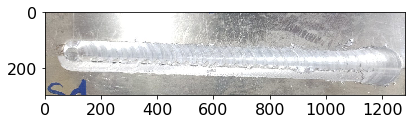

In [50]:
path_class = data_path + "Good_Weld"
a_names, a_shapes, a_images = read_folder(path_class)
path_class = data_path + "Pass_Weld"
p_names, p_shapes, p_images = read_folder(path_class)
path_class = data_path + "Poor_Weld"
l_names, l_shapes, l_images = read_folder(path_class)

In [51]:
len(a_images), len(p_images), len(l_images)

(58, 39, 62)

In [52]:
sa_images = create_all_sub_images(a_images)
sp_images = create_all_sub_images(p_images)
sl_images = create_all_sub_images(l_images)

print(len(sa_images), len(a_images))
print(len(sp_images), len(p_images))
print(len(sl_images), len(l_images))

238 58
196 39
252 62


In [53]:
print(len(sa_images), len(a_images))
print(len(sp_images), len(p_images))
print(len(sl_images), len(l_images))

all_images = []
all_images.extend(sa_images)
all_images.extend(sp_images)
all_images.extend(sl_images)
ys = []
ys.extend(list(np.zeros(len(sa_images))))
ys.extend(list(np.ones(len(sp_images))))
ys.extend(list(2*np.ones(len(sl_images))))
len(ys), len(all_images)


Xs = []
all_shapes = []
N = 224
for i in range(len(all_images)):
    img = all_images[i]
    rimg = transform.resize(img, (N, N))
    Xs.append(rimg)

Xs = np.array(Xs)

238 58
196 39
252 62


In [54]:
len(ys),Xs.shape,len(all_images)

(686, (686, 224, 224, 3), 686)

In [55]:
from tensorflow.keras.utils import to_categorical

y_c = to_categorical(ys, 3)

In [13]:
#################################################################################################
# Load Models : MobileNetV2

from keras import models
from keras import backend as k

if k.backend() == 'tensorflow':
  print('Clear old session')
  k.clear_session()

model_name = "MobileNetV2"

print('Report :',datetime.datetime.now())
print('\n Load Model ', model_name)
model1 = models.load_model(model_path+model_name+"_1.tf")
model2 = models.load_model(model_path+model_name+"_2.tf")
model3 = models.load_model(model_path+model_name+"_3.tf")
model4 = models.load_model(model_path+model_name+"_4.tf")
model5 = models.load_model(model_path+model_name+"_5.tf")

print('\n Predict')
start = datetime.datetime.now()
ypred1 = model1.predict(Xs*255)
ypred2 = model2.predict(Xs*255)
ypred3 = model3.predict(Xs*255)
ypred4 = model4.predict(Xs*255)
ypred5 = model5.predict(Xs*255)
end= datetime.datetime.now()
elapsed= end-start

Clear old session
Report : 2022-11-30 17:18:28.876811

 Load Model  MobileNetV2

 Predict
22/22 [==============================] - 2s 42ms/step


In [56]:
print('\n Predict')
start = datetime.datetime.now()
ypred1 = model1.predict(Xs*255)
ypred2 = model2.predict(Xs*255)
ypred3 = model3.predict(Xs*255)
ypred4 = model4.predict(Xs*255)
ypred5 = model5.predict(Xs*255)
end= datetime.datetime.now()
elapsed= end-start
ypred5.shape, elapsed


 Predict
22/22 [==============================] - 1s 41ms/step


((686, 3), datetime.timedelta(seconds=10, microseconds=64881))

In [38]:
pip install -U pymoo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.9 MB 32.9 MB/s 
     |████████████████████████████████| 249 kB 67.0 MB/s 
     |████████████████████████████████| 80 kB 9.8 MB/s 
     |████████████████████████████████| 207 kB 70.2 MB/s 
  Created wheel for grapheme: filename=grapheme-0.6.0-py3-none-any.whl size=210096 sha256=bea04a5eb791f24f8554257e6133541b04047f69fb22bb42d5834f68dc868e8d
  Stored in directory: /root/.cache/pip/wheels/71/fc/c8/142ef03b79c02b618fe80b9f2d01c25bd55f60b0c58eab3f0e
Successfully built grapheme


In [57]:
from pymoo.algorithms.soo.nonconvex.brkga import BRKGA
from pymoo.algorithms.soo.nonconvex.de import DE
import numpy as np
from pymoo.core.problem import ElementwiseProblem
import math




class EnsembleProblem(ElementwiseProblem):
    
    def __init__(self, N=5):
        super().__init__(n_var=N, n_obj=1, n_constr=0, xl=0, xu=1)

    

    def _evaluate(self, xs, out, *args, **kwargs):
        
        #w  = (xs + 0.5)/np.sum(xs + 0.5)
        w = (xs )/np.sum(xs)
        #w  = w*0.75+0.25/5


        ypred_en = (ypred1*w[0] + ypred2*w[1] + ypred3*w[2] + ypred4*w[3] + ypred5*w[4])
        indexs = np.where(ypred_en>1)
        ypred_en[indexs] = 1

        ypred_max_en = np.argmax(ypred_en, axis=1)
        d = ypred_en - y_c
        import math
        #f = math.sqrt(np.sum(d*d))  + np.std(w)*0

        f = 1 - accuracy_score(ys, ypred_max_en)
        
        #print("TTTTTTTTTTT")
        out["hash"] = hash(str(w))
        #out["F"] = -max_hardness #maximize
        out["F"] = f
        out["pheno"] = {"weights": w}

In [58]:

from pymoo.algorithms.soo.nonconvex.de import DE
from pymoo.optimize import minimize
import matplotlib.pyplot as plt
import numpy as np
from pymoo.algorithms.soo.nonconvex.ga import GA
from pymoo.problems import get_problem
from pymoo.core.callback import Callback
from pymoo.optimize import minimize

algorithm = DE(
    pop_size=100,
    variant="DE/rand/1/bin",
    CR=0.3,
    dither="vector",
    jitter=False
)

problem = EnsembleProblem()
res = minimize(problem,
            algorithm,
            ("n_gen", 1000),
                seed=1,
                #display=MyDisplay(),
                verbose=True)

n_gen  |  n_eval  |     f_avg     |     f_min    
     1 |      100 |  0.1615451895 |  0.0510204082
     2 |      200 |  0.1249854227 |  0.0510204082
     3 |      300 |  0.1000874636 |  0.0510204082
     4 |      400 |  0.0857871720 |  0.0495626822
     5 |      500 |  0.0771137026 |  0.0495626822
     6 |      600 |  0.0675072886 |  0.0495626822
     7 |      700 |  0.0638192420 |  0.0466472303
     8 |      800 |  0.0607725948 |  0.0466472303
     9 |      900 |  0.0584548105 |  0.0466472303
    10 |     1000 |  0.0568658892 |  0.0466472303
    11 |     1100 |  0.0558746356 |  0.0466472303
    12 |     1200 |  0.0550000000 |  0.0466472303
    13 |     1300 |  0.0537900875 |  0.0466472303
    14 |     1400 |  0.0529154519 |  0.0466472303
    15 |     1500 |  0.0519387755 |  0.0451895044
    16 |     1600 |  0.0515306122 |  0.0451895044
    17 |     1700 |  0.0509183673 |  0.0451895044
    18 |     1800 |  0.0506413994 |  0.0451895044
    19 |     1900 |  0.0502040816 |  0.0451895044


In [61]:
xs = res.X
w = (xs )/np.sum(xs)
#w  = w*0.75+0.25/5
weights1 = w
weights1, res.X

(array([0.47030532, 0.00829115, 0.00066027, 0.09844304, 0.42230022]),
 array([0.6706896 , 0.01182378, 0.0009416 , 0.14038694, 0.60223085]))

In [62]:
def result_weight_models(model_name, weights):
  from sklearn import metrics
  from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, auc, roc_auc_score
  import seaborn as sns
  import matplotlib.pyplot as plt
  
  print('Report :',datetime.datetime.now())
  print('\n')
  ypred_max_m1 = np.argmax(ypred1, axis=1)
  print('Model 1 : ', model_name, ' has Accuracy ',accuracy_score(ys, ypred_max_m1))
  print('Model 1 : ', model_name, ' has AUC ',roc_auc_score(ys, ypred1, multi_class='ovr'))
  print('Model 1 : ', model_name, ' has F1 ',f1_score(ys, ypred_max_m1,average='weighted'))
  print('\n')
  ypred_max_m2 = np.argmax(ypred2, axis=1)
  print('Model 2 : ', model_name, ' has Accuracy ',accuracy_score(ys, ypred_max_m2))
  print('Model 2 : ', model_name, ' has AUC ',roc_auc_score(ys, ypred2, multi_class='ovr'))
  print('Model 2 : ', model_name, ' has F1 ',f1_score(ys, ypred_max_m2,average='weighted'))
  print('\n')
  ypred_max_m3 = np.argmax(ypred3, axis=1)
  print('Model 3 : ', model_name, ' has Accuracy ',accuracy_score(ys, ypred_max_m3))
  print('Model 3 : ', model_name, ' has AUC ',roc_auc_score(ys, ypred3, multi_class='ovr'))
  print('Model 3 : ', model_name, ' has F1 ',f1_score(ys, ypred_max_m3,average='weighted'))
  print('\n')
  ypred_max_m4 = np.argmax(ypred4, axis=1)
  print('Model 4 : ', model_name, ' has Accuracy ',accuracy_score(ys, ypred_max_m4))
  print('Model 4 : ', model_name, ' has AUC ',roc_auc_score(ys, ypred4, multi_class='ovr'))
  print('Model 4 : ', model_name, ' has F1 ',f1_score(ys, ypred_max_m4,average='weighted'))
  print('\n')
  ypred_max_m5 = np.argmax(ypred5, axis=1)
  print('Model 5 : ', model_name, ' has Accuracy ',accuracy_score(ys, ypred_max_m5))
  print('Model 5 : ', model_name, ' has AUC ',roc_auc_score(ys, ypred5, multi_class='ovr'))
  print('Model 5 : ', model_name, ' has F1 ',f1_score(ys, ypred_max_m5,average='weighted'))
  print('\n')
  
  ypred_en = (ypred1 + ypred2 + ypred3 + ypred4 + ypred5)/5
  ypred_max_en = np.argmax(ypred_en, axis=1)
  print('Ensemble Model : ', model_name, ' used Total time: ', elapsed/5, 'seconds')
  print('Ensemble Model : ', model_name, ' has Accuracy ',accuracy_score(ys, ypred_max_en))
  print('Ensemble Model : ', model_name, ' has AUC ',roc_auc_score(ys, ypred_en, multi_class='ovr'))
  print('Ensemble Model : ', model_name, ' has F1 ',f1_score(ys, ypred_max_en,average='weighted'))


  ypred_en = (ypred1*weights[0] + ypred2*weights[1] + ypred3*weights[2] + ypred4*weights[3] + ypred5*weights[4])
  ypred_max_en = np.argmax(ypred_en, axis=1)
  print('Weight Ensemble Model : ', model_name, ' used Total time: ', elapsed/5, 'seconds')
  print('Weight Ensemble Model : ', model_name, ' has Accuracy ',accuracy_score(ys, ypred_max_en))
  print('Weight Ensemble Model : ', model_name, ' has AUC ',roc_auc_score(ys, ypred_en, multi_class='ovr'))
  print('Weight Ensemble Model : ', model_name, ' has F1 ',f1_score(ys, ypred_max_en,average='weighted'))
  

  
  cf_matrix = confusion_matrix(ys, ypred_max_en)
  cf_matrix
  ax = sns.heatmap(cf_matrix, annot=True, fmt='.3g', cmap='Blues')
  plt.rcParams['font.size'] = 16
  ax.set_title('\nEnsemble '+model_name+'\n');
  ax.set_xlabel('\nPredicted Label')
  ax.set_ylabel('Actual Label ');
  ax.xaxis.set_ticklabels(['Good', 'Pass', 'Poor'])
  ax.yaxis.set_ticklabels(['Good', 'Pass', 'Poor'])

Report : 2022-11-30 17:31:52.192056


Model 1 :  MobileNetV2  has Accuracy  0.9271137026239067
Model 1 :  MobileNetV2  has AUC  0.9919238343058678
Model 1 :  MobileNetV2  has F1  0.9270821884496523


Model 2 :  MobileNetV2  has Accuracy  0.32798833819241985
Model 2 :  MobileNetV2  has AUC  0.5128662522173671
Model 2 :  MobileNetV2  has F1  0.3042085654875798


Model 3 :  MobileNetV2  has Accuracy  0.35422740524781343
Model 3 :  MobileNetV2  has AUC  0.5621581559531134
Model 3 :  MobileNetV2  has F1  0.2641100396202437


Model 4 :  MobileNetV2  has Accuracy  0.35131195335276966
Model 4 :  MobileNetV2  has AUC  0.5300125479110523
Model 4 :  MobileNetV2  has F1  0.24842123086948364


Model 5 :  MobileNetV2  has Accuracy  0.9314868804664723
Model 5 :  MobileNetV2  has AUC  0.9908857715970596
Model 5 :  MobileNetV2  has F1  0.931574294676572


Ensemble Model :  MobileNetV2  used Total time:  0:00:02.012976 seconds
Ensemble Model :  MobileNetV2  has Accuracy  0.8950437317784257
Ensemble Mode

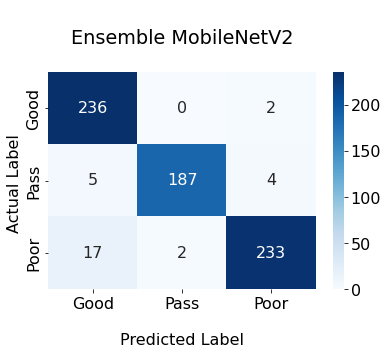

In [63]:
result_weight_models('MobileNetV2', weights1)

DenseNet121_1.tf     EfficientNetV2S_1.tf    MobileNetV2_1.tf
DenseNet121_2.tf     EfficientNetV2S_2.tf    MobileNetV2_2.tf
DenseNet121_3.tf     EfficientNetV2S_3.tf    MobileNetV2_3.tf
DenseNet121_4.tf     EfficientNetV2S_4.tf    MobileNetV2_4.tf
DenseNet121_5.tf     EfficientNetV2S_5.tf    MobileNetV2_5.tf
EfficientNetB1_1.tf  InceptionResNetV2_1.tf  ResNet101V2_1.tf
EfficientNetB1_2.tf  InceptionResNetV2_2.tf  ResNet101V2_2.tf
EfficientNetB1_3.tf  InceptionResNetV2_3.tf  ResNet101V2_3.tf
EfficientNetB1_4.tf  InceptionResNetV2_4.tf  ResNet101V2_4.tf
EfficientNetB1_5.tf  InceptionResNetV2_5.tf  ResNet101V2_5.tf
Load /content/drive/MyDrive/FSW_Data/Lab_Data_Testing_3/
part image
51 12
40 8
55 13
51 12
40 8
55 13
create Xs,ys


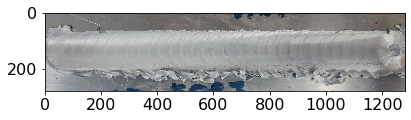

In [64]:
data_path = "/content/drive/MyDrive/FSW_Data/Lab_Data_Testing_3/"
model_path =  "/content/drive/MyDrive/FSW_Data/1108_Seg_Checkpoint_3/"

!ls "/content/drive/MyDrive/FSW_Data/1108_Seg_Checkpoint_3/"

print("Load", data_path)
path_class = data_path + "Good_Weld"
a_names, a_shapes, a_images = read_folder(path_class)
path_class = data_path + "Pass_Weld"
p_names, p_shapes, p_images = read_folder(path_class)
path_class = data_path + "Poor_Weld"
l_names, l_shapes, l_images = read_folder(path_class)

print("part image")
sa_images = create_all_sub_images(a_images)
sp_images = create_all_sub_images(p_images)
sl_images = create_all_sub_images(l_images)

print(len(sa_images), len(a_images))
print(len(sp_images), len(p_images))
print(len(sl_images), len(l_images))

print(len(sa_images), len(a_images))
print(len(sp_images), len(p_images))
print(len(sl_images), len(l_images))

print("create Xs,ys")
all_images = []
all_images.extend(sa_images)
all_images.extend(sp_images)
all_images.extend(sl_images)
ys = []
ys.extend(list(np.zeros(len(sa_images))))
ys.extend(list(np.ones(len(sp_images))))
ys.extend(list(2*np.ones(len(sl_images))))
len(ys), len(all_images)


Xs = []
all_shapes = []
N = 224
for i in range(len(all_images)):
    img = all_images[i]
    rimg = transform.resize(img, (N, N))
    Xs.append(rimg)

Xs = np.array(Xs)
from tensorflow.keras.utils import to_categorical

y_c = to_categorical(ys, 3)

In [65]:
print('\n Predict')
start = datetime.datetime.now()
ypred1 = model1.predict(Xs*255)
ypred2 = model2.predict(Xs*255)
ypred3 = model3.predict(Xs*255)
ypred4 = model4.predict(Xs*255)
ypred5 = model5.predict(Xs*255)
end= datetime.datetime.now()
elapsed= end-start


 Predict
5/5 [==============================] - 0s 40ms/step


Report : 2022-11-30 17:33:07.982190


Model 1 :  MobileNetV2  has Accuracy  0.8698630136986302
Model 1 :  MobileNetV2  has AUC  0.9779048285378971
Model 1 :  MobileNetV2  has F1  0.8702667358359537


Model 2 :  MobileNetV2  has Accuracy  0.3287671232876712
Model 2 :  MobileNetV2  has AUC  0.4978153436868899
Model 2 :  MobileNetV2  has F1  0.3004444022398565


Model 3 :  MobileNetV2  has Accuracy  0.3698630136986301
Model 3 :  MobileNetV2  has AUC  0.603200110538448
Model 3 :  MobileNetV2  has F1  0.2661696304489634


Model 4 :  MobileNetV2  has Accuracy  0.3493150684931507
Model 4 :  MobileNetV2  has AUC  0.5498769027151235
Model 4 :  MobileNetV2  has F1  0.25307873253078733


Model 5 :  MobileNetV2  has Accuracy  0.8972602739726028
Model 5 :  MobileNetV2  has AUC  0.9647135114627375
Model 5 :  MobileNetV2  has F1  0.8963305446914259


Ensemble Model :  MobileNetV2  used Total time:  0:00:00.441437 seconds
Ensemble Model :  MobileNetV2  has Accuracy  0.8767123287671232
Ensemble Model :

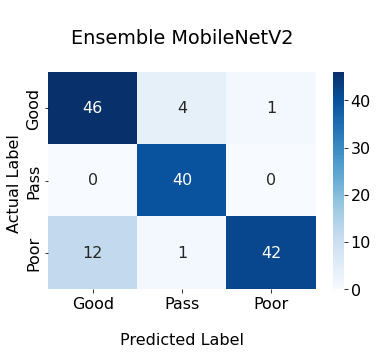

In [66]:
result_weight_models('MobileNetV2', (weights1))


In [67]:
from pymoo.algorithms.soo.nonconvex.de import DE
from pymoo.optimize import minimize
import matplotlib.pyplot as plt
import numpy as np
from pymoo.algorithms.soo.nonconvex.ga import GA
from pymoo.problems import get_problem
from pymoo.core.callback import Callback
from pymoo.optimize import minimize

algorithm = DE(
    pop_size=100,
    variant="DE/rand/1/bin",
    CR=0.3,
    dither="vector",
    jitter=False
)

problem = EnsembleProblem()
res = minimize(problem,
            algorithm,
            ("n_gen", 1000),
                seed=1,
                #display=MyDisplay(),
                verbose=True)

n_gen  |  n_eval  |     f_avg     |     f_min    
     1 |      100 |  0.1847945205 |  0.0958904110
     2 |      200 |  0.1525342466 |  0.0958904110
     3 |      300 |  0.1313698630 |  0.0958904110
     4 |      400 |  0.1256849315 |  0.0958904110
     5 |      500 |  0.1201369863 |  0.0958904110
     6 |      600 |  0.1163698630 |  0.0958904110
     7 |      700 |  0.1132191781 |  0.0958904110
     8 |      800 |  0.1112328767 |  0.0958904110
     9 |      900 |  0.1101369863 |  0.0958904110
    10 |     1000 |  0.1080821918 |  0.0958904110
    11 |     1100 |  0.1070547945 |  0.0890410959
    12 |     1200 |  0.1060958904 |  0.0890410959
    13 |     1300 |  0.1054794521 |  0.0890410959
    14 |     1400 |  0.1044520548 |  0.0890410959
    15 |     1500 |  0.1036986301 |  0.0890410959
    16 |     1600 |  0.1032876712 |  0.0890410959
    17 |     1700 |  0.1028767123 |  0.0890410959
    18 |     1800 |  0.1023287671 |  0.0890410959
    19 |     1900 |  0.1020547945 |  0.0890410959


In [69]:
res.X
weights2 = res.X/np.sum(res.X)
weights2 # [0.15, 0, 0.34, 0.18, 0.35]

array([1.51866964e-01, 1.36319075e-04, 3.37926522e-01, 1.57285832e-01,
       3.52784363e-01])

Test result
Report : 2022-11-30 17:36:45.088633


Model 1 :  MobileNetV2  has Accuracy  0.8698630136986302
Model 1 :  MobileNetV2  has AUC  0.9779048285378971
Model 1 :  MobileNetV2  has F1  0.8702667358359537


Model 2 :  MobileNetV2  has Accuracy  0.3287671232876712
Model 2 :  MobileNetV2  has AUC  0.4978153436868899
Model 2 :  MobileNetV2  has F1  0.3004444022398565


Model 3 :  MobileNetV2  has Accuracy  0.3698630136986301
Model 3 :  MobileNetV2  has AUC  0.603200110538448
Model 3 :  MobileNetV2  has F1  0.2661696304489634


Model 4 :  MobileNetV2  has Accuracy  0.3493150684931507
Model 4 :  MobileNetV2  has AUC  0.5498769027151235
Model 4 :  MobileNetV2  has F1  0.25307873253078733


Model 5 :  MobileNetV2  has Accuracy  0.8972602739726028
Model 5 :  MobileNetV2  has AUC  0.9647135114627375
Model 5 :  MobileNetV2  has F1  0.8963305446914259


Ensemble Model :  MobileNetV2  used Total time:  0:00:00.441437 seconds
Ensemble Model :  MobileNetV2  has Accuracy  0.8767123287671232
Ense

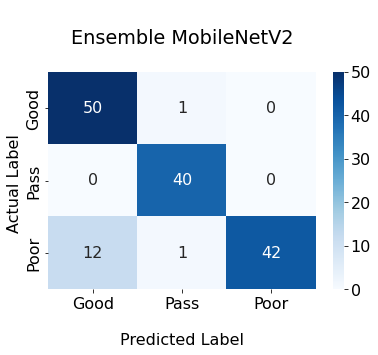

In [78]:
print("Test result")
result_weight_models('MobileNetV2', (weights1*0.1 + weights2*0.9))

Report : 2022-11-04 17:59:27.051892


Model 1 :  MobileNetV2  has Accuracy  0.636986301369863
Model 1 :  MobileNetV2  has AUC  0.81826135494209
Model 1 :  MobileNetV2  has F1  0.636392366461011


Model 2 :  MobileNetV2  has Accuracy  0.6232876712328768
Model 2 :  MobileNetV2  has AUC  0.7703476247710723
Model 2 :  MobileNetV2  has F1  0.6180948793450393


Model 3 :  MobileNetV2  has Accuracy  0.6986301369863014
Model 3 :  MobileNetV2  has AUC  0.8316810768399646
Model 3 :  MobileNetV2  has F1  0.6980982457946078


Model 4 :  MobileNetV2  has Accuracy  0.6164383561643836
Model 4 :  MobileNetV2  has AUC  0.8368229319051504
Model 4 :  MobileNetV2  has F1  0.6152329952724165


Model 5 :  MobileNetV2  has Accuracy  0.6643835616438356
Model 5 :  MobileNetV2  has AUC  0.8409410749274352
Model 5 :  MobileNetV2  has F1  0.6605436494195845


Ensemble Model :  MobileNetV2  used Total time:  0:00:07.257664 seconds
Ensemble Model :  MobileNetV2  has Accuracy  0.6712328767123288
Ensemble Model :  Mo

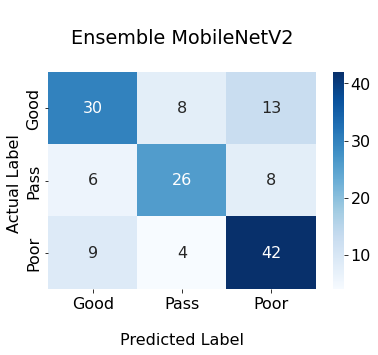

In [ ]:
result_models('MobileNetV2')

In [ ]:
#################################################################################################
# Load Models : DenseNet121

from keras import models
from keras import backend as k

if k.backend() == 'tensorflow':
  print('Clear old session')
  k.clear_session()

model_name = "DenseNet121"

print('Report :',datetime.datetime.now())
print('\n Load Model ', model_name)
model1 = models.load_model(model_path+model_name+"_1.tf")
model2 = models.load_model(model_path+model_name+"_2.tf")
model3 = models.load_model(model_path+model_name+"_3.tf")
model4 = models.load_model(model_path+model_name+"_4.tf")
model5 = models.load_model(model_path+model_name+"_5.tf")

print('\n Predict')
start = datetime.datetime.now()
ypred1 = model1.predict(Xs*255)
ypred2 = model2.predict(Xs*255)
ypred3 = model3.predict(Xs*255)
ypred4 = model4.predict(Xs*255)
ypred5 = model5.predict(Xs*255)
end= datetime.datetime.now()
elapsed= end-start

Clear old session
Report : 2022-11-05 00:28:58.689371

 Load Model  DenseNet121

 Predict
5/5 [==============================] - 23s 4s/step


Report : 2022-11-05 00:36:00.255635


Model 1 :  DenseNet121  has Accuracy  0.678082191780822
Model 1 :  DenseNet121  has AUC  0.8356319355333609
Model 1 :  DenseNet121  has F1  0.6744837456552852


Model 2 :  DenseNet121  has Accuracy  0.7397260273972602
Model 2 :  DenseNet121  has AUC  0.8742343415747236
Model 2 :  DenseNet121  has F1  0.7404910158334815


Model 3 :  DenseNet121  has Accuracy  0.7054794520547946
Model 3 :  DenseNet121  has AUC  0.8230576907142418
Model 3 :  DenseNet121  has F1  0.7039404015424466


Model 4 :  DenseNet121  has Accuracy  0.6712328767123288
Model 4 :  DenseNet121  has AUC  0.8376883440533479
Model 4 :  DenseNet121  has F1  0.6708315971574816


Model 5 :  DenseNet121  has Accuracy  0.5684931506849316
Model 5 :  DenseNet121  has AUC  0.7000919573251485
Model 5 :  DenseNet121  has F1  0.5673176179298134


Ensemble Model :  DenseNet121  used Total time:  0:00:43.548566 seconds
Ensemble Model :  DenseNet121  has Accuracy  0.7054794520547946
Ensemble Model : 

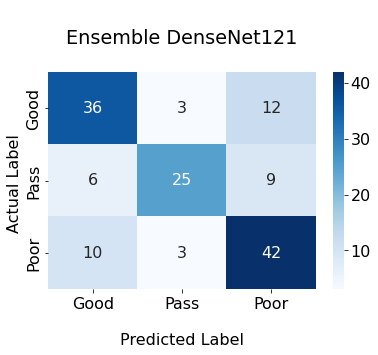

In [ ]:
result_models('DenseNet121')

In [ ]:
#################################################################################################
# Load Models : ResNet101V2

from keras import models
from keras import backend as k

if k.backend() == 'tensorflow':
  print('Clear old session')
  k.clear_session()

model_name = "ResNet101V2"

print('Report :',datetime.datetime.now())
print('\n Load Model ', model_name)
model1 = models.load_model(model_path+model_name+"_1.tf")
model2 = models.load_model(model_path+model_name+"_2.tf")
model3 = models.load_model(model_path+model_name+"_3.tf")
model4 = models.load_model(model_path+model_name+"_4.tf")
model5 = models.load_model(model_path+model_name+"_5.tf")

print('\n Predict')
start = datetime.datetime.now()
ypred1 = model1.predict(Xs*255)
ypred2 = model2.predict(Xs*255)
ypred3 = model3.predict(Xs*255)
ypred4 = model4.predict(Xs*255)
ypred5 = model5.predict(Xs*255)
end= datetime.datetime.now()
elapsed= end-start

Clear old session
Report : 2022-11-05 00:40:40.592514

 Load Model  ResNet101V2

 Predict
5/5 [==============================] - 45s 9s/step


Report : 2022-11-05 00:56:39.643301


Model 1 :  ResNet101V2  has Accuracy  0.5958904109589042
Model 1 :  ResNet101V2  has AUC  0.8001457055578207
Model 1 :  ResNet101V2  has F1  0.5947743480954025


Model 2 :  ResNet101V2  has Accuracy  0.7328767123287672
Model 2 :  ResNet101V2  has AUC  0.8419157074824754
Model 2 :  ResNet101V2  has F1  0.7326550195445952


Model 3 :  ResNet101V2  has Accuracy  0.7328767123287672
Model 3 :  ResNet101V2  has AUC  0.8467675814848548
Model 3 :  ResNet101V2  has F1  0.7301930035222263


Model 4 :  ResNet101V2  has Accuracy  0.6712328767123288
Model 4 :  ResNet101V2  has AUC  0.8349764891662783
Model 4 :  ResNet101V2  has F1  0.6681940132766881


Model 5 :  ResNet101V2  has Accuracy  0.6643835616438356
Model 5 :  ResNet101V2  has AUC  0.8402928887288371
Model 5 :  ResNet101V2  has F1  0.6636751682125148


Ensemble Model :  ResNet101V2  used Total time:  0:00:58.976741 seconds
Ensemble Model :  ResNet101V2  has Accuracy  0.7191780821917808
Ensemble Model :

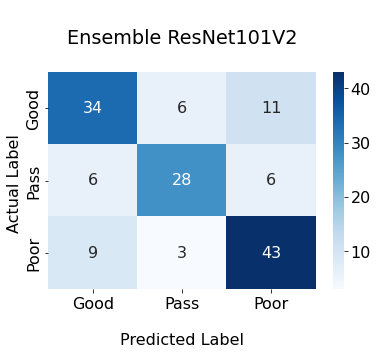

In [ ]:
result_models('ResNet101V2')

In [ ]:
#################################################################################################
# Load Models : EfficientNetB1

from keras import models
from keras import backend as k

if k.backend() == 'tensorflow':
  print('Clear old session')
  k.clear_session()

model_name = "EfficientNetB1"

print('Report :',datetime.datetime.now())
print('\n Load Model ', model_name)
model1 = models.load_model(model_path+model_name+"_1.tf")
model2 = models.load_model(model_path+model_name+"_2.tf")
model3 = models.load_model(model_path+model_name+"_3.tf")
model4 = models.load_model(model_path+model_name+"_4.tf")
model5 = models.load_model(model_path+model_name+"_5.tf")

print('\n Predict')
start = datetime.datetime.now()
ypred1 = model1.predict(Xs*255)
ypred2 = model2.predict(Xs*255)
ypred3 = model3.predict(Xs*255)
ypred4 = model4.predict(Xs*255)
ypred5 = model5.predict(Xs*255)
end= datetime.datetime.now()
elapsed= end-start

Clear old session
Report : 2022-11-05 01:01:06.534027

 Load Model  EfficientNetB1

 Predict
5/5 [==============================] - 15s 2s/step


Report : 2022-11-05 01:07:33.568505


Model 1 :  EfficientNetB1  has Accuracy  0.7054794520547946
Model 1 :  EfficientNetB1  has AUC  0.8516371162020734
Model 1 :  EfficientNetB1  has F1  0.7018160764006742


Model 2 :  EfficientNetB1  has Accuracy  0.726027397260274
Model 2 :  EfficientNetB1  has AUC  0.8619291637414775
Model 2 :  EfficientNetB1  has F1  0.7265042008724691


Model 3 :  EfficientNetB1  has Accuracy  0.4178082191780822
Model 3 :  EfficientNetB1  has AUC  0.5596326728226956
Model 3 :  EfficientNetB1  has F1  0.4121662986489739


Model 4 :  EfficientNetB1  has Accuracy  0.684931506849315
Model 4 :  EfficientNetB1  has AUC  0.8230213871161065
Model 4 :  EfficientNetB1  has F1  0.6841816262522095


Model 5 :  EfficientNetB1  has Accuracy  0.7397260273972602
Model 5 :  EfficientNetB1  has AUC  0.8814100372500396
Model 5 :  EfficientNetB1  has F1  0.738013281802297


Ensemble Model :  EfficientNetB1  used Total time:  0:00:19.911123 seconds
Ensemble Model :  EfficientNetB1  h

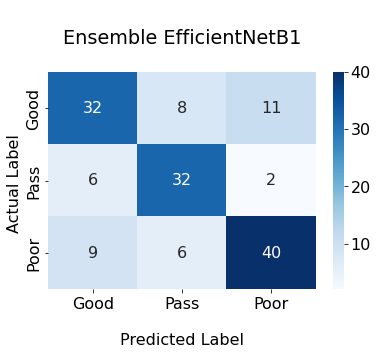

In [ ]:
result_models('EfficientNetB1')

In [ ]:
#################################################################################################
# Load Models : InceptionResNetV2

from keras import models
from keras import backend as k

if k.backend() == 'tensorflow':
  print('Clear old session')
  k.clear_session()

model_name = "InceptionResNetV2"

print('Report :',datetime.datetime.now())
print('\n Load Model ', model_name)
model1 = models.load_model(model_path+model_name+"_1.tf")
model2 = models.load_model(model_path+model_name+"_2.tf")
model3 = models.load_model(model_path+model_name+"_3.tf")
model4 = models.load_model(model_path+model_name+"_4.tf")
model5 = models.load_model(model_path+model_name+"_5.tf")

print('\n Predict')
start = datetime.datetime.now()
ypred1 = model1.predict(Xs*255)
ypred2 = model2.predict(Xs*255)
ypred3 = model3.predict(Xs*255)
ypred4 = model4.predict(Xs*255)
ypred5 = model5.predict(Xs*255)
end= datetime.datetime.now()
elapsed= end-start

Clear old session
Report : 2022-11-05 01:15:04.524561

 Load Model  InceptionResNetV2

 Predict
5/5 [==============================] - 38s 7s/step


Report : 2022-11-05 01:23:55.815143


Model 1 :  InceptionResNetV2  has Accuracy  0.6575342465753424
Model 1 :  InceptionResNetV2  has AUC  0.7833679562708712
Model 1 :  InceptionResNetV2  has F1  0.6537401265850501


Model 2 :  InceptionResNetV2  has Accuracy  0.7328767123287672
Model 2 :  InceptionResNetV2  has AUC  0.8492644547072375
Model 2 :  InceptionResNetV2  has F1  0.7327471579492861


Model 3 :  InceptionResNetV2  has Accuracy  0.6986301369863014
Model 3 :  InceptionResNetV2  has AUC  0.8287751339404474
Model 3 :  InceptionResNetV2  has F1  0.6985651705832127


Model 4 :  InceptionResNetV2  has Accuracy  0.6643835616438356
Model 4 :  InceptionResNetV2  has AUC  0.8221846520498604
Model 4 :  InceptionResNetV2  has F1  0.6639798456583154


Model 5 :  InceptionResNetV2  has Accuracy  0.6232876712328768
Model 5 :  InceptionResNetV2  has AUC  0.799690106075555
Model 5 :  InceptionResNetV2  has F1  0.6209816670813266


Ensemble Model :  InceptionResNetV2  used Total time:  0:00:43.

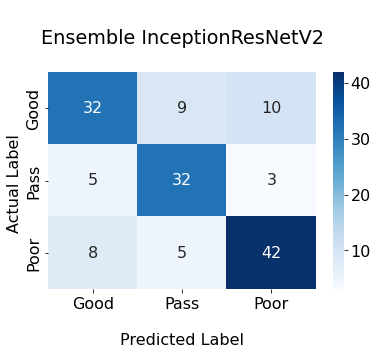

In [ ]:
result_models('InceptionResNetV2')

In [ ]:
#################################################################################################
# Load Models : Heterogeneous Ensemble CNN

from keras import models
from keras import backend as k

if k.backend() == 'tensorflow':
  print('Clear old session')
  k.clear_session()

model_name = "Heterogeneous Ensemble CNN"

print('Report :',datetime.datetime.now())
print('\n Load Model ', model_name)
print('MobileNetV2 (3)')
model1 = models.load_model(model_path+"MobileNetV2_3.tf")
print('DenseNet121 (2)')
model2 = models.load_model(model_path+"DenseNet121_2.tf")
print('EfficientNetB1 (5)')
model3 = models.load_model(model_path+"EfficientNetB1_5.tf")
print('ResNet101V2 (4)')
model4 = models.load_model(model_path+"ResNet101V2_4.tf")
print('InceptionResNetV2 (1)')
model5 = models.load_model(model_path+"InceptionResNetV2_1.tf")

print('\n Predict')
start = datetime.datetime.now()
ypred1 = model1.predict(Xs*255)
ypred2 = model2.predict(Xs*255)
ypred3 = model3.predict(Xs*255)
ypred4 = model4.predict(Xs*255)
ypred5 = model5.predict(Xs*255)
end= datetime.datetime.now()
elapsed= end-start

Clear old session
Report : 2022-11-05 03:39:23.125920

 Load Model  Heterogeneous Ensemble CNN
MobileNetV2 (5)
DenseNet121 (1)
EfficientNetB1 (4)
ResNet101V2 (3)
InceptionResNetV2 (3)

 Predict
5/5 [==============================] - 38s 7s/step


Report : 2022-11-05 03:50:22.993852


Model 1 :  Heterogeneous Ensemble CNN  has Accuracy  0.6986301369863014
Model 1 :  Heterogeneous Ensemble CNN  has AUC  0.8316810768399646
Model 1 :  Heterogeneous Ensemble CNN  has F1  0.6980982457946078


Model 2 :  Heterogeneous Ensemble CNN  has Accuracy  0.7397260273972602
Model 2 :  Heterogeneous Ensemble CNN  has AUC  0.8742343415747236
Model 2 :  Heterogeneous Ensemble CNN  has F1  0.7404910158334815


Model 3 :  Heterogeneous Ensemble CNN  has Accuracy  0.7397260273972602
Model 3 :  Heterogeneous Ensemble CNN  has AUC  0.8814100372500396
Model 3 :  Heterogeneous Ensemble CNN  has F1  0.738013281802297


Model 4 :  Heterogeneous Ensemble CNN  has Accuracy  0.6712328767123288
Model 4 :  Heterogeneous Ensemble CNN  has AUC  0.8349764891662783
Model 4 :  Heterogeneous Ensemble CNN  has F1  0.6681940132766881


Model 5 :  Heterogeneous Ensemble CNN  has Accuracy  0.6575342465753424
Model 5 :  Heterogeneous Ensemble CNN  has AUC  0.7833679562708

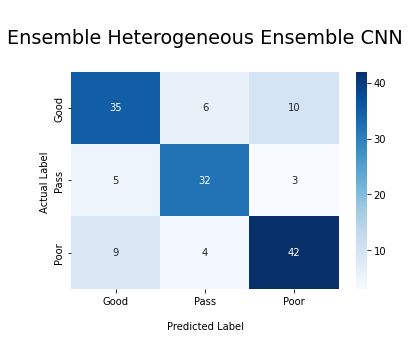

In [ ]:
result_models('Heterogeneous Ensemble CNN')

In [ ]:
#################################################################################################
# Load Models : Heterogeneous CNN

from keras import models
from keras import backend as k

if k.backend() == 'tensorflow':
  print('Clear old session')
  k.clear_session()

model_name = "Heterogeneous Ensemble CNN"

print('Report :',datetime.datetime.now())
print('\n Load Model ', model_name)
print('MobileNetV2 (3)')
model1 = models.load_model(model_path+"MobileNetV2_3.tf")
print('DenseNet121 (2)')
model2 = models.load_model(model_path+"DenseNet121_2.tf")
print('EfficientNetB1 (5)')
model3 = models.load_model(model_path+"EfficientNetB1_5.tf")
print('ResNet101V2 (2)')
model4 = models.load_model(model_path+"ResNet101V2_2.tf")
print('InceptionResNetV2 (2)')
model5 = models.load_model(model_path+"InceptionResNetV2_2.tf")

print('\n Predict')
start = datetime.datetime.now()
ypred1 = model1.predict(Xs*255)
ypred2 = model2.predict(Xs*255)
ypred3 = model3.predict(Xs*255)
ypred4 = model4.predict(Xs*255)
ypred5 = model5.predict(Xs*255)
end= datetime.datetime.now()
elapsed= end-start

Clear old session
Report : 2022-11-05 03:55:07.809438

 Load Model  Heterogeneous Ensemble CNN
MobileNetV2 (3)
DenseNet121 (2)
EfficientNetB1 (5)
ResNet101V2 (2)
InceptionResNetV2 (2)

 Predict
5/5 [==============================] - 6s 367ms/step


Report : 2022-11-05 04:52:46.829310


Model 1 :  Heterogeneous CNN  has Accuracy  0.6986301369863014
Model 1 :  Heterogeneous CNN  has AUC  0.8316810768399646
Model 1 :  Heterogeneous CNN  has F1  0.6980982457946078


Model 2 :  Heterogeneous CNN  has Accuracy  0.7397260273972602
Model 2 :  Heterogeneous CNN  has AUC  0.8742343415747236
Model 2 :  Heterogeneous CNN  has F1  0.7404910158334815


Model 3 :  Heterogeneous CNN  has Accuracy  0.7397260273972602
Model 3 :  Heterogeneous CNN  has AUC  0.8814100372500396
Model 3 :  Heterogeneous CNN  has F1  0.738013281802297


Model 4 :  Heterogeneous CNN  has Accuracy  0.7328767123287672
Model 4 :  Heterogeneous CNN  has AUC  0.8419157074824754
Model 4 :  Heterogeneous CNN  has F1  0.7326550195445952


Model 5 :  Heterogeneous CNN  has Accuracy  0.7328767123287672
Model 5 :  Heterogeneous CNN  has AUC  0.8492644547072375
Model 5 :  Heterogeneous CNN  has F1  0.7327471579492861


Ensemble Model :  Heterogeneous CNN  used Total time:  0:00:06.

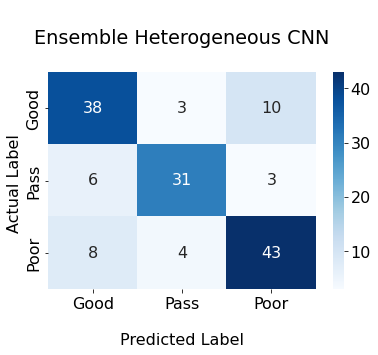

In [ ]:
result_models('Heterogeneous CNN')